In [87]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('movie_reviews')
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import text2emotion as te
import textblob

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


## __Data collection and description__ 

#### __1. Connecting to Amazon and download reviews__ 

In [3]:
oneplus_reviews=[]

In [4]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

#### __2. Downloading review from Amazon.in for the phone OnePlus 7__ 

In [5]:
oneplus_reviews = list(set(oneplus_reviews))

#### __3. Cleaning the text__ 

In [6]:
txt_upd = ' '.join(oneplus_reviews)

In [7]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [8]:
text_tokens = word_tokenize(txt_upd)

In [9]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

#### __4. Create the DF__ 

In [10]:
tf = TfidfVectorizer()

In [11]:
text_tf = tf.fit_transform(tokens_without_sw)

In [12]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [13]:
df.head()

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
word_list = ' '.join(df)

In [15]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

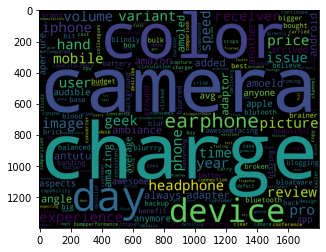

In [16]:
plt.imshow(wordcloud)

## __Sentimental Analysis__ 

In [17]:
df1=pd.read_csv("Elon_musk.csv",encoding='cp1252')

In [18]:
df1=df1.set_index("Unnamed: 0")

In [19]:
df1.head()

,Text
Unnamed: 0,
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [20]:
df1.shape

(1999, 1)

In [21]:
comments = list(set(df1.Text))

In [22]:
txt_updt = ' '.join(comments)

In [23]:
txt_updt = re.sub("[^A-Za-z" "]+"," ",txt_updt).lower() #remove special character
txt_updt = re.sub("[0-9" "]+"," ",txt_updt).lower() #remove numbers
txt_updt = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_updt).lower() #remove hyperlink

In [24]:
text_tokens = word_tokenize(txt_updt)

In [25]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [27]:
tf = TfidfVectorizer()

In [28]:
text_tf = tf.fit_transform(tokens_without_sw)

In [29]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df2 =pd.DataFrame(denselist, columns=feature_names)

In [30]:
df2.head()

,aa,aayypcpp,ab,able,abo,aboard,abort,absence,absolute,absolutely,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
word_list = ' '.join(df2)

In [32]:
wordcloudEM = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

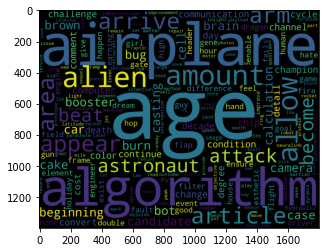

In [33]:
plt.imshow(wordcloudEM)

## __Sentimental Analysis using positive and negative words__ 

In [34]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [35]:
positive_words = positive_words[35:]

In [36]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [37]:
negative_words = negative_words[35:]

In [38]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [39]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [40]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [41]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## Emotion Mining

In [75]:
# txt_updt

In [94]:
# te.get_emotion("txt_updt")

In [82]:
def textblob_Sentiment(text):
    print("Starting TextBlob Sentiment Analysis")
    from textblob import TextBlob
    from textblob.sentiments import NaiveBayesAnalyzer
    
    score =  TextBlob(text,analyzer=NaiveBayesAnalyzer()).sentiment
    return score

In [89]:
textblob_Sentiment("wordcloudEM")

Starting TextBlob Sentiment Analysis


Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)

In [90]:
# input_sen = str(input("Enter Text: "))
# print(" ")
# score = textblob_Sentiment(input_sen)
# print("Score: ", score)

## __Conclusion__ 

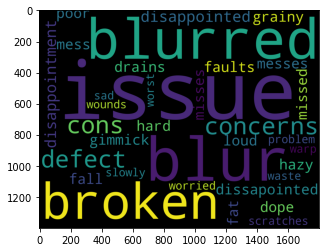

In [42]:
plt.imshow(wordcloud_neg)

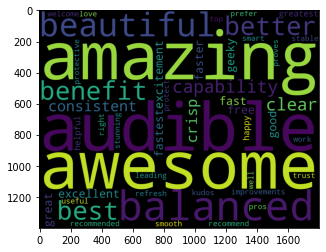

In [43]:
plt.imshow(wordcloud_pos)